# C. elegans analysis

This notebook shows data from experiments involving the effects of 10074-G5 on various strains of Caenorhabditis elegans (C. elegans). All C. elegans data are taken from day 6 of adulthood.

N2 denotes the wild-type C. elegans strain.
GMC101 (GMC) denotes a strain in which amyloid-β is over-expressed in muscle tissues.
OW450 denotes a strain in which the expression of the yellow fluorescent protein (YFP) is controlled by the same gene as the GMC101 strain.

In [1]:
#import useful things
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

## Effects of 10074-G5 on C elegans behavioural phenotypes 

These experiments quantify the movement phenotypes of the GMC101 strain in the presence and absence of 10074-G5.

In [2]:
#Load in video analysis tracker output
GMC_DMSO  = pd.read_csv('Video_analysis/GMC_DMSO_Day6.txt',  header=4, sep=",| \s+", engine='python').values.flatten()
GMC_10074_G5_1uM  = pd.read_csv('Video_analysis/GMC_10074_G5_1uM_Day6.txt',  header=4, sep=",| \s+", engine='python').values.flatten()
GMC_10074_G5_5uM  = pd.read_csv('Video_analysis/GMC_10075_G5_5uM_Day6.txt',  header=4, sep=",| \s+", engine='python').values.flatten()
N2  = pd.read_csv('Video_analysis/N2_Day6.txt',  header=4, sep=",| \s+", engine='python').values.flatten()

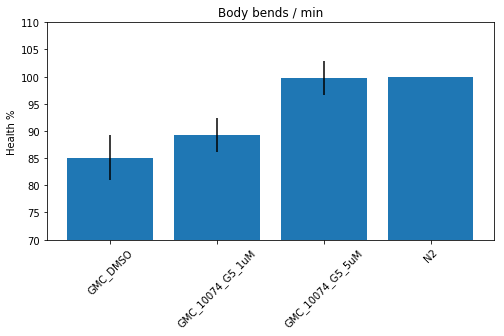

In [3]:
#Plot body bends per minute
#Calculate average value
BPM_av = {'GMC_DMSO': np.reshape(GMC_DMSO.copy(), (-1, 7))[:,1].mean(),
          'GMC_10074_G5_1uM': np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,1].mean(),
          'GMC_10074_G5_5uM': np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,1].mean(), 
          'N2': np.reshape(N2.copy(), (-1, 7))[:,1].mean()}

#Normalise to N2 control
BPM_norm = {'GMC_DMSO': 100*BPM_av['GMC_DMSO']/BPM_av['N2'],
            'GMC_10074_G5_1uM': 100*BPM_av['GMC_10074_G5_1uM']/BPM_av['N2'],
            'GMC_10074_G5_5uM': 100*BPM_av['GMC_10074_G5_5uM']/BPM_av['N2'], 
            'N2': 100*BPM_av['N2']/BPM_av['N2']}

#Calculate standard error of the mean
BPM_SEM_raw = {'GMC_DMSO': stats.sem(np.reshape(GMC_DMSO.copy(), (-1, 7))[:,1]),
               'GMC_10074_G5_1uM': stats.sem(np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,1]),
               'GMC_10074_G5_5uM': stats.sem(np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,1]), 
               'N2': stats.sem(np.reshape(N2.copy(), (-1, 7))[:,1])}

#Propagate error
BPM_err = {'GMC_DMSO': 100*np.sqrt((BPM_SEM_raw['GMC_DMSO']/BPM_av['GMC_DMSO'])**2 + (BPM_SEM_raw['N2']/BPM_av['N2'])**2),
           'GMC_10074_G5_1uM': 100*np.sqrt((BPM_SEM_raw['GMC_10074_G5_1uM']/BPM_av['GMC_10074_G5_1uM'])**2 + (BPM_SEM_raw['N2']/BPM_av['N2'])**2),
           'GMC_10074_G5_5uM': 100*np.sqrt((BPM_SEM_raw['GMC_10074_G5_5uM']/BPM_av['GMC_10074_G5_5uM'])**2 + (BPM_SEM_raw['N2']/BPM_av['N2'])**2),
           'N2': 0}

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar(range(len(BPM_norm)), list(BPM_norm.values()), yerr=list(BPM_err.values()))
ax.set_xticks(range(len(BPM_norm))) 
ax.set_xticklabels(list(BPM_norm.keys()), rotation=45)
ax.set_ylim([70,110])
ax.set_title('Body bends / min')
ax.set_ylabel('Health %')
plt.show()

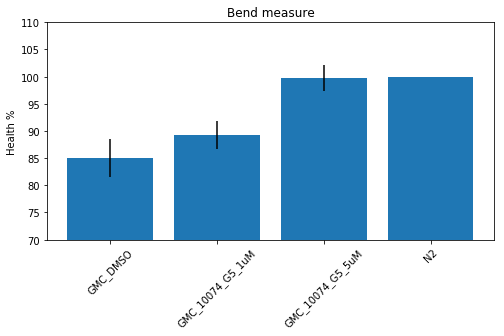

In [4]:
#Plot bend measure
#Calculate average value
BM_av = {'GMC_DMSO': np.reshape(GMC_DMSO.copy(), (-1, 7))[:,2].mean(),
          'GMC_10074_G5_1uM': np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,2].mean(),
          'GMC_10074_G5_5uM': np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,2].mean(), 
          'N2': np.reshape(N2.copy(), (-1, 7))[:,2].mean()}

#Normalise to N2 control
BM_norm = {'GMC_DMSO': 100*BM_av['GMC_DMSO']/BM_av['N2'],
            'GMC_10074_G5_1uM': 100*BM_av['GMC_10074_G5_1uM']/BM_av['N2'],
            'GMC_10074_G5_5uM': 100*BM_av['GMC_10074_G5_5uM']/BM_av['N2'], 
            'N2': 100*BM_av['N2']/BM_av['N2']}

#Calculate standard error of the mean
BM_SEM_raw = {'GMC_DMSO': stats.sem(np.reshape(GMC_DMSO.copy(), (-1, 7))[:,2]),
               'GMC_10074_G5_1uM': stats.sem(np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,2]),
               'GMC_10074_G5_5uM': stats.sem(np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,2]), 
               'N2': stats.sem(np.reshape(N2.copy(), (-1, 7))[:,2])}

#Propagate error
BM_err = {'GMC_DMSO': 100*np.sqrt((BM_SEM_raw['GMC_DMSO']/BM_av['GMC_DMSO'])**2 + (BM_SEM_raw['N2']/BM_av['N2'])**2),
           'GMC_10074_G5_1uM': 100*np.sqrt((BM_SEM_raw['GMC_10074_G5_1uM']/BM_av['GMC_10074_G5_1uM'])**2 + (BM_SEM_raw['N2']/BM_av['N2'])**2),
           'GMC_10074_G5_5uM': 100*np.sqrt((BM_SEM_raw['GMC_10074_G5_5uM']/BM_av['GMC_10074_G5_5uM'])**2 + (BM_SEM_raw['N2']/BM_av['N2'])**2),
           'N2': 0}

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar(range(len(BPM_norm)), list(BPM_norm.values()), yerr=list(BM_err.values()))
ax.set_xticks(range(len(BM_av))) 
ax.set_xticklabels(list(BM_av.keys()), rotation=45)
ax.set_ylim([70,110])
ax.set_title('Bend measure')
ax.set_ylabel('Health %')
plt.show()

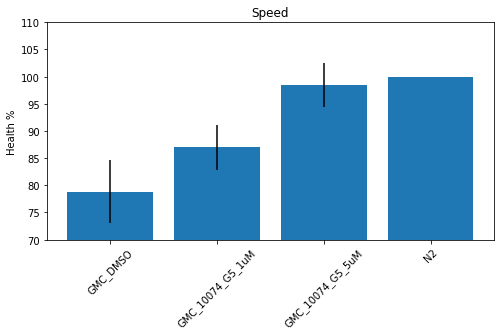

In [5]:
#Plot speed
#Calculate average value
Speed_av = {'GMC_DMSO': np.reshape(GMC_DMSO.copy(), (-1, 7))[:,3].mean(),
          'GMC_10074_G5_1uM': np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,3].mean(),
          'GMC_10074_G5_5uM': np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,3].mean(), 
          'N2': np.reshape(N2.copy(), (-1, 7))[:,3].mean()}

#Normalise to N2 control
Speed_norm = {'GMC_DMSO': 100*Speed_av['GMC_DMSO']/Speed_av['N2'],
            'GMC_10074_G5_1uM': 100*Speed_av['GMC_10074_G5_1uM']/Speed_av['N2'],
            'GMC_10074_G5_5uM': 100*Speed_av['GMC_10074_G5_5uM']/Speed_av['N2'], 
            'N2': 100*Speed_av['N2']/Speed_av['N2']}

#Calculate standard error of the mean
Speed_SEM_raw = {'GMC_DMSO': stats.sem(np.reshape(GMC_DMSO.copy(), (-1, 7))[:,3]),
               'GMC_10074_G5_1uM': stats.sem(np.reshape(GMC_10074_G5_1uM.copy(), (-1, 7))[:,3]),
               'GMC_10074_G5_5uM': stats.sem(np.reshape(GMC_10074_G5_5uM.copy(), (-1, 7))[:,3]), 
               'N2': stats.sem(np.reshape(N2.copy(), (-1, 7))[:,3])}

#Propagate error
Speed_err = {'GMC_DMSO': 100*np.sqrt((Speed_SEM_raw['GMC_DMSO']/Speed_av['GMC_DMSO'])**2 + (Speed_SEM_raw['N2']/Speed_av['N2'])**2),
           'GMC_10074_G5_1uM': 100*np.sqrt((Speed_SEM_raw['GMC_10074_G5_1uM']/Speed_av['GMC_10074_G5_1uM'])**2 + (Speed_SEM_raw['N2']/Speed_av['N2'])**2),
           'GMC_10074_G5_5uM': 100*np.sqrt((Speed_SEM_raw['GMC_10074_G5_5uM']/Speed_av['GMC_10074_G5_5uM'])**2 + (Speed_SEM_raw['N2']/Speed_av['N2'])**2),
           'N2': 0}

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar(range(len(Speed_norm)), list(Speed_norm.values()), yerr=list(Speed_err.values()))
ax.set_xticks(range(len(Speed_norm))) 
ax.set_xticklabels(list(Speed_norm.keys()), rotation=45)
ax.set_ylim([70,110])
ax.set_title('Speed')
ax.set_ylabel('Health %')
plt.show()

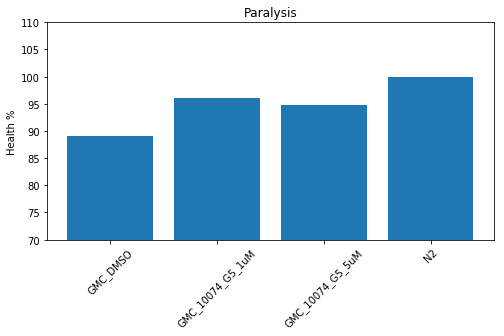

In [6]:
#Plot Survival/Paralysis rate (note that this is a single value given by tracker code, not in files)
Paralysis_rate = {'GMC_DMSO': 0.782352941,'GMC_10074_G5_1uM': 0.843304843, 'GMC_10074_G5_5uM': 0.8325, 'N2': 0.877813504}

#Normalise to N2 control
Paralysis_norm = {'GMC_DMSO': 100*Paralysis_rate['GMC_DMSO']/Paralysis_rate['N2'],
                  'GMC_10074_G5_1uM': 100*Paralysis_rate['GMC_10074_G5_1uM']/Paralysis_rate['N2'],
                  'GMC_10074_G5_5uM': 100*Paralysis_rate['GMC_10074_G5_5uM']/Paralysis_rate['N2'],
                  'N2': 100*Paralysis_rate['N2']/Paralysis_rate['N2']}

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar(range(len(Paralysis_norm)), list(Paralysis_norm.values()))
ax.set_xticks(range(len(Paralysis_norm))) 
ax.set_xticklabels(list(Paralysis_norm.keys()), rotation=45)
ax.set_ylim([70,110])
ax.set_title('Paralysis')
ax.set_ylabel('Health %')
plt.show()

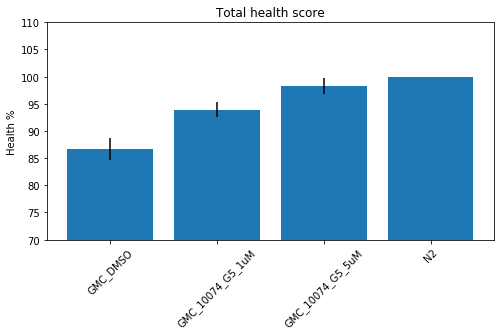

In [7]:
#Calculate and plot total health score
#Calculate average value (sum of all normed scores above, divided by 4)
Health_tot = {'GMC_DMSO': (BPM_norm['GMC_DMSO']+BM_norm['GMC_DMSO']+Speed_norm['GMC_DMSO']+Paralysis_norm['GMC_DMSO'])/4, 
              'GMC_10074_G5_1uM': (BPM_norm['GMC_10074_G5_1uM']+BM_norm['GMC_10074_G5_1uM']+Speed_norm['GMC_10074_G5_1uM']+Paralysis_norm['GMC_10074_G5_1uM'])/4,
              'GMC_10074_G5_5uM': (BPM_norm['GMC_10074_G5_5uM']+BM_norm['GMC_10074_G5_5uM']+Speed_norm['GMC_10074_G5_5uM']+Paralysis_norm['GMC_10074_G5_5uM'])/4,
              'N2': (BPM_norm['N2']+BM_norm['N2']+Speed_norm['N2']+Paralysis_norm['N2'])/4}

#Propagate error
Health_err = {'GMC_DMSO': np.sqrt(BPM_err['GMC_DMSO']**2+BM_err['GMC_DMSO']**2+Speed_err['GMC_DMSO']**2)/4, 
              'GMC_10074_G5_1uM': np.sqrt(BPM_err['GMC_10074_G5_1uM']**2+BM_err['GMC_10074_G5_1uM']**2+Speed_err['GMC_10074_G5_1uM']**2)/4,
              'GMC_10074_G5_5uM': np.sqrt(BPM_err['GMC_10074_G5_5uM']**2+BM_err['GMC_10074_G5_5uM']**2+Speed_err['GMC_10074_G5_5uM']**2)/4,
              'N2': np.sqrt(BPM_err['N2']**2+BM_err['N2']**2+Speed_err['N2']**2)/4}

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar(range(len(Health_tot)), list(Health_tot.values()), yerr=list(Health_err.values()))
ax.set_xticks(range(len(Health_tot))) 
ax.set_xticklabels(list(Health_tot.keys()), rotation=45)
ax.set_ylim([70,110])
ax.set_title('Total health score')
ax.set_ylabel('Health %')
plt.show()

## Aggregate staining of C elegans in the presence and absence of 10074-G5

These experiments quantify the amount of NIAD-4 (an amyloid-specific fluorescence probe) in the GMC101 strain treated wth and without 10074-G5.

In [8]:
#Load in aggregate data (using NIAD-4 dye)
GMC_DMSO_agg  = pd.read_csv('Aggregate_staining/GMC_0uM_10074_G5.csv', sep=",").values.flatten()
GMC_10074_G5_1uM_agg  = pd.read_csv('Aggregate_staining/GMC_1uM_10074_G5.csv', sep=",").values.flatten()
GMC_10074_G5_5uM_agg  = pd.read_csv('Aggregate_staining/GMC_5uM_10074_G5.csv', sep=",").values.flatten()
N2_agg  = pd.read_csv('Aggregate_staining/N2.csv', sep=",").values.flatten()

#Reformat data
GMC_DMSO_agg_days = np.reshape(GMC_DMSO_agg.copy(), (3, 3))
GMC_10074_G5_1uM_agg_days = np.reshape(GMC_10074_G5_1uM_agg.copy(), (3, 3))
GMC_10074_G5_5uM_agg_days = np.reshape(GMC_10074_G5_5uM_agg.copy(), (3, 3))
N2_agg_days = np.reshape(N2_agg.copy(), (3, 3))


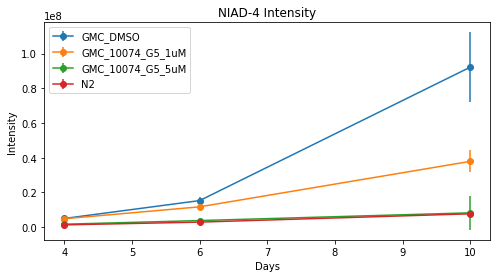

In [9]:
#Plot
days = [4, 6, 10]
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.errorbar(days, GMC_DMSO_agg_days[:,1], yerr=GMC_DMSO_agg_days[:,2], marker='o', label='GMC_DMSO')
ax.errorbar(days, GMC_10074_G5_1uM_agg_days[:,1], yerr=GMC_10074_G5_1uM_agg_days[:,2], marker='o', label='GMC_10074_G5_1uM')
ax.errorbar(days, GMC_10074_G5_5uM_agg_days[:,1], yerr=GMC_10074_G5_5uM_agg_days[:,2], marker='o', label='GMC_10074_G5_5uM')
ax.errorbar(days, N2_agg_days[:,1], yerr=N2_agg_days[:,2], marker='o', label='N2')
ax.set_title('NIAD-4 Intensity')
ax.set_xlabel('Days')
ax.set_ylabel('Intensity')
ax.legend()

plt.show()

## E. coli growth curves in presence and absence of 10074-G5

These experiments follow the growth of E. coli in the presence and absence of 10074-G5.

In [10]:
#Load in E. coli growth data
Time  = pd.read_csv('E_coli_growth/Time_hours.csv', sep=",", engine='python').values.flatten()
E_coli_DMSO  = pd.read_csv('E_coli_growth/DMSO_rep1_rep2.csv', sep=",", engine='python').values
E_coli_10074_G5  = pd.read_csv('E_coli_growth/10074_G5_rep1_rep2.csv', sep=",", engine='python').values

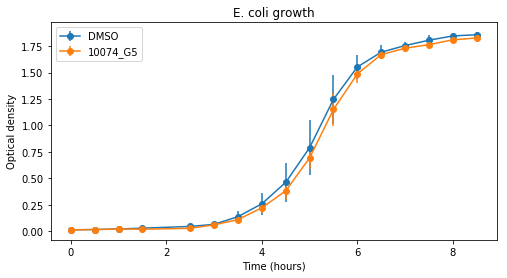

In [11]:
#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.errorbar(Time, E_coli_DMSO.mean(axis=1), yerr=E_coli_DMSO.std(axis=1, ddof=1), marker='o', label='DMSO')
ax.errorbar(Time, E_coli_10074_G5.mean(axis=1), yerr=E_coli_10074_G5.std(axis=1, ddof=1), marker='o', label='10074_G5')
ax.set_title('E. coli growth')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Optical density')
ax.legend()

plt.show()

## YFP fluorescence intensity of control C. elegans in presence and absence of 10074-G5

These experiments measure the effects of 10074-G5 on the fluorescence of C. elegans which express YFP (OW450). The YFP gene is controlled by the same promoter gene as amyloid-β in the GMC101 strain.

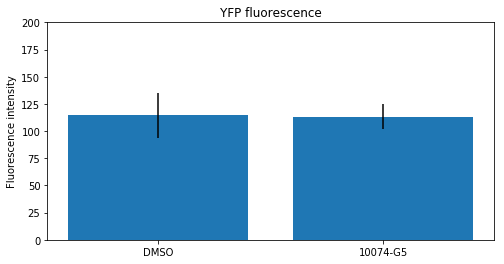

In [12]:
#Load in YFP fluorescence intensity data. Note some measurements account for several animals 
YFP_DMSO  = pd.read_csv('YFP_fluorescence/DMSO.csv', sep=",", engine='python').values
YFP_10074_G5  = pd.read_csv('YFP_fluorescence/10074_G5.csv', sep=",", engine='python').values

#Calculate mean intensities
YFP_DMSO_mean = YFP_DMSO[:,0].mean()
YFP_10074_G5_mean = YFP_10074_G5[:,0].mean()

#Calculate total number of animals
YFP_DMSO_sum = YFP_DMSO[:,1].sum()
YFP_10074_G5_sum = YFP_10074_G5[:,1].sum()

#Calculate standard deviations of intensities. ddof corrects N value, accounting for total animals
YFP_DMSO_SD = YFP_DMSO[:,0].std(ddof=1-(YFP_DMSO_sum-YFP_DMSO.shape[0]))
YFP_10074_G5_SD = YFP_10074_G5[:,0].std(ddof=1-(YFP_10074_G5_sum-YFP_10074_G5.shape[0]))

#Plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1], [YFP_DMSO_mean, YFP_10074_G5_mean], yerr=[YFP_DMSO_SD, YFP_10074_G5_SD])
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['DMSO', '10074-G5'])
ax.set_ylim([0,200])
ax.set_title('YFP fluorescence')
ax.set_ylabel('Fluorescence intensity')
plt.show()

## Dot blot analysis of C. elegans lysates in presence and absence of 10074-G5

Analysis of C. elegans lysates in the presence of 5 uM 10074-G5. Experiments examine the presenece of YFP in the OW450 strain and amyloid-β in the GMC101 strain. α-Tubulin was probed as a control in parallel blots to ensure consistent loading.

In [13]:
#Load in data
#For OW450 (YFP) C. elegans
YFP_antiYFP_DMSO  = pd.read_csv('Dot_blots/YFP_antiYFP_DMSO.csv', sep=",", engine='python').values.flatten()
YFP_antiYFP_10074_G5  = pd.read_csv('Dot_blots/YFP_antiYFP_10074_G5.csv', sep=",", engine='python').values.flatten()
YFP_antiTubulin_DMSO  = pd.read_csv('Dot_blots/YFP_antiTubulin_DMSO.csv', sep=",", engine='python').values.flatten()
YFP_antiTubulin_10074_G5  = pd.read_csv('Dot_blots/YFP_antiTubulin_10074_G5.csv', sep=",", engine='python').values.flatten()

#For GMC101 (AB) C. elegans
GMC_antiAB_DMSO  = pd.read_csv('Dot_blots/GMC_antiAB_DMSO.csv', sep=",", engine='python').values.flatten()
GMC_antiAB_10074_G5  = pd.read_csv('Dot_blots/GMC_antiAB_10074_G5.csv', sep=",", engine='python').values.flatten()
GMC_antiTubulin_DMSO  = pd.read_csv('Dot_blots/GMC_antiTubulin_DMSO.csv', sep=",", engine='python').values.flatten()
GMC_antiTubulin_10074_G5  = pd.read_csv('Dot_blots/GMC_antiTubulin_10074_G5.csv', sep=",", engine='python').values.flatten()


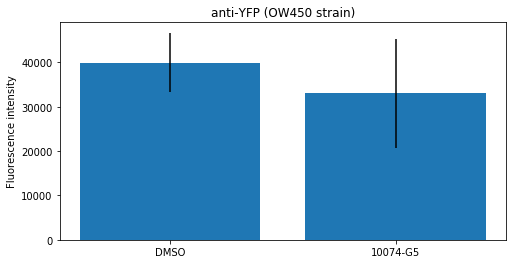

In [14]:
#Plot anti-YFP signal in lystaes from OW450 strain
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1], [YFP_antiYFP_DMSO.mean(), YFP_antiYFP_10074_G5.mean()], yerr=[YFP_antiYFP_DMSO.std(ddof=1), YFP_antiYFP_10074_G5.std(ddof=1)])
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['DMSO', '10074-G5'])
ax.set_title('anti-YFP (OW450 strain)')
ax.set_ylabel('Fluorescence intensity')
plt.show()

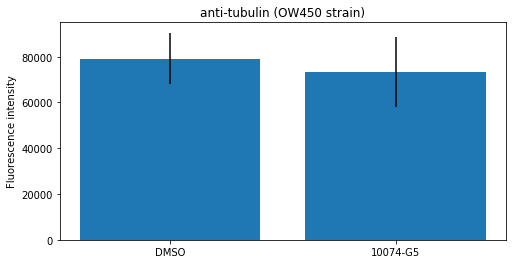

In [15]:
#Plot anti-tubulin signal in lystaes from OW450 strain
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1], [YFP_antiTubulin_DMSO.mean(), YFP_antiTubulin_10074_G5.mean()], yerr=[YFP_antiTubulin_DMSO.std(ddof=1), YFP_antiTubulin_10074_G5.std(ddof=1)])
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['DMSO', '10074-G5'])
ax.set_title('anti-tubulin (OW450 strain)')
ax.set_ylabel('Fluorescence intensity')
plt.show()

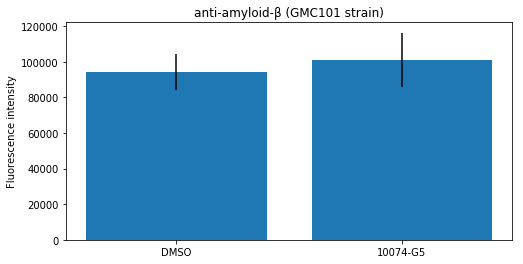

In [16]:
#Plot anti-amyloid-β signal in lystaes from GMC101 strain
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1], [GMC_antiAB_DMSO.mean(), GMC_antiAB_10074_G5.mean()], yerr=[GMC_antiAB_DMSO.std(ddof=1), GMC_antiAB_10074_G5.std(ddof=1)])
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['DMSO', '10074-G5'])
ax.set_title('anti-amyloid-β (GMC101 strain)')
ax.set_ylabel('Fluorescence intensity')
plt.show()

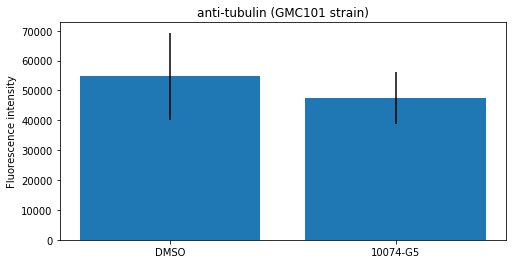

In [17]:
#Plot anti-tubulin signal in lystaes from GMC101 strain
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1], [GMC_antiTubulin_DMSO.mean(), GMC_antiTubulin_10074_G5.mean()], yerr=[GMC_antiTubulin_DMSO.std(ddof=1), GMC_antiTubulin_10074_G5.std(ddof=1)])
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['DMSO', '10074-G5'])
ax.set_title('anti-tubulin (GMC101 strain)')
ax.set_ylabel('Fluorescence intensity')
plt.show()